# Bearbeitung des Datensatzes: Checkouts

In diesem Jupyter-Notebook wurde auf die frei verfügbaren Daten der Seattle Library zugegriffen. Aufgabenstellung ist, das Datenset auf zwei selbst gewählte Fragen hin zu untersuchen und die Lösungen auf diese Frage durch Python zu implementieren. 

Folgende Fragen werden in diesem Jupyter-Notebook gestellt und beantwortet:

1. Welche items wurden mehr als 100x im Jahr 2018 ausgeliehen?
2. Wie oft werden items im Durchschnitt ausgeliehen?
3. Wie ist das Verhältnis zwischen Books und Ebooks in der Ausleihe?

In [2]:
# Als erstes werden  die nötigen libraries importiert, um den Datensatz bearbeiten und später Grafiken erstellen zu können.

import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Es werden zwei neue Variablen definiert: URL und checkouts_file

url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=10000"
checkouts_file = "checkouts.csv"

In [4]:
# Nun wird angegeben, wie die Daten downgeloadet werden können. Dazu wird auf urllib.request.urlretrieve aus urllib.request zurückgegriffen. Url und checkouts_file werden als Positionsargumente übergeben.

urllib.request.urlretrieve(url, checkouts_file)

('checkouts.csv', <http.client.HTTPMessage at 0x238fc529f48>)

In [18]:
# Die Daten werden durch Pandas in ein lesbares Format definiert.
checkouts = pd.read_csv(checkouts_file)

In [6]:
# Nun kann ich mir die Daten anzeigen lassen.
checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-","Small Gary 1951, Psychiatry Popular works, Psy...","William Morrow,",[2010]
1,Physical,Horizon,BOOK,2018,12,1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",NaN,"Dramatists Play Service,",[1991]
2,Physical,Horizon,SOUNDDISC,2018,12,1,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940","Psychiatrists Fiction, Wealth Moral and ethica...","Naxos AudioBooks,",[2010]
3,Physical,Horizon,BOOK,2018,12,1,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",Fishing,"DK Pub.,",2008.
4,Physical,Horizon,BOOK,2018,12,1,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn","Darwin Charles 1809 1882 Juvenile literature, ...","National Geographic,",[2009]
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2018,12,2,My little polar bear / Claudia Rueda.,"Rueda, Claudia","Polar bear Juvenile fiction, Bears Juvenile fi...","Scholastic Press,",2009.
9996,Digital,OverDrive,EBOOK,2018,12,1,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,"Fiction, Humor (Fiction), Mystery","Random House, Inc.",2009
9997,Digital,OverDrive,EBOOK,2018,12,2,The India Fan,Victoria Holt,"Fiction, Historical Fiction, Romance, Suspense",Sourcebooks,2013
9998,Physical,Horizon,VIDEODISC,2018,12,5,"30 Rock. Season 7, the final season / Universa...",NaN,"Rockefeller Center Drama, Television comedy wr...","Universal Studios Home Entertainment,",[2013]


In [7]:
# Über den Befehl .columns kann ich mir die Spaltenüberschriften anzeigen lassen, um einen Überblick zu bekommen.
checkouts.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

In [8]:
# Ich entscheide mich dazu, die Tabelle zur einfacheren Übersicht etwas zu verkleinern und nur die für mich relevanten Spalten anzeigen zu lassen.

checkouts[["title","creator","materialtype","checkouts"]]

,title,creator,materialtype,checkouts
0,The naked lady who stood on her head : a psych...,"Small, Gary, 1951-",BOOK,1
1,The night of the iguana / by Tennessee Williams.,"Williams, Tennessee, 1911-1983",BOOK,1
2,Tender is the night / F. Scott Fitzgerald.,"Fitzgerald, F. Scott (Francis Scott), 1896-1940",SOUNDDISC,1
3,Be prepared fishing / Henry Gilbey.,"Gilbey, Henry",BOOK,1
4,What Darwin saw : the journey that changed the...,"Schanzer, Rosalyn",BOOK,1
...,...,...,...,...
9995,My little polar bear / Claudia Rueda.,"Rueda, Claudia",BOOK,2
9996,"Love Over Scotland: 44 Scotland Street Series,...",Alexander McCall Smith,EBOOK,1
9997,The India Fan,Victoria Holt,EBOOK,2
9998,"30 Rock. Season 7, the final season / Universa...",NaN,VIDEODISC,5


In [15]:
# Als nächstes interessiert mich, welches die maximale Ausleihzahl war. Dafür gebe ich den Spaltennamen "Checkouts" und den Befehl "max()" an.

checkouts.checkouts.max()

585

In [9]:
# Da ich dies für eine sehr hohe Ausleihanzahl halte, interessiert mich, welche Medien >= 100X ausgeliehen wurden. 

checkouts["checkouts"] >= 100

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: checkouts, Length: 10000, dtype: bool

## 1. Frage: Welche items wurden mehr als 100x im Jahr 2018 ausgeliehen?

Zum Abschluss eines Jahres würde mich in einer Bibliothek bezogen auf den Bestand interessieren, welche items verhältnismäßig oft ausgeliehen wurden. Dies kann zum einen statistische Hintergründe haben. Zum anderen ist die Frage jedoch auch für die Bestandsarbeit relevant: items mit hoher Nachfrage können nachbestellt werden, außerdem kann von einem hohen Verschleiss der items ausgegangen werden. Gerade CDs/DVDs werden schnell durch Kratzer unbauchbar. Mit einer Liste der meinst-ausgeliehensten Medien können die items ermittelt und überprüft werden. 

In [17]:
# Da die Liste oben mir nur eine Series zurückgibt, muss ich meine Abfrage genauer definieren. Ich kann den Befehl jedoch nutzen, um den ursprünglichen Dataframe zu filten und mir nur die Zeilen ausgeben lassen, in denen der Rückgabewert "true" ist. 

checkouts[checkouts["checkouts"] >= 100]

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
335,Physical,Horizon,VIDEODISC,2018,12,103,The seagull / a Laluchien production & Markey ...,NaN,"Artists Russia 19th century Drama, Authors Rus...","Sony Pictures Classics,",[2018]
1152,Physical,Horizon,VIDEODISC,2018,12,148,Blade runner 2049 / Warner Bros. Pictures ; Al...,NaN,"Los Angeles Calif Police Department Drama, And...","Warner Bros. Home Entertainment,",[2018]
1179,Digital,Zinio,MAGAZINE,2018,12,108,Men's Health,NaN,NaN,NaN,NaN
2895,Physical,Horizon,VIDEODISC,2018,12,184,A quiet place / Paramount Pictures ; Platinum ...,NaN,"Human alien encounters Drama, Monsters Drama, ...","Paramount,",[2018]
3054,Physical,Horizon,VIDEODISC,2018,12,100,"Adrift / STX Films, Lakeshore Entertainment, H...",NaN,"Ashcraft Tami Oldham 1960 Drama, Sailing Drama...","Universal Pictures Home Entertainment,",[2018]
3626,Physical,Horizon,BOOK,2018,12,138,A gentleman in Moscow / Amor Towles.,"Towles, Amor","Aristocracy Social class Fiction, Home detenti...","Viking,",[2016]
4074,Physical,Horizon,VIDEODISC,2018,12,173,Sorry to bother you / Annapurna Pictures ; a S...,NaN,"Success Drama, Telemarketing Drama, Labor unio...","Twentieth Century Fox Home Entertainment,",[2018]
4775,Digital,OverDrive,AUDIOBOOK,2018,12,103,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,"African American Fiction, Fiction, Historical ...",Books on Tape,2016
5226,Digital,OverDrive,EBOOK,2018,12,135,Born a Crime: Stories from a South African Chi...,Trevor Noah,"Biography & Autobiography, Humor (Nonfiction),...","Random House, Inc.",2016
5313,Digital,OverDrive,AUDIOBOOK,2018,12,198,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,"Biography & Autobiography, Nonfiction, Religio...",Books on Tape,2018


In [11]:
# Ich lege den Dataframe in einer neuen Variablen ab...

max_checkouts = checkouts[checkouts["checkouts"] >= 100]

In [13]:
# ...Und lasse mir diesen zum Abschluss nochmal anzeigen.

max_checkouts

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
335,Physical,Horizon,VIDEODISC,2018,12,103,The seagull / a Laluchien production & Markey ...,NaN,"Artists Russia 19th century Drama, Authors Rus...","Sony Pictures Classics,",[2018]
1152,Physical,Horizon,VIDEODISC,2018,12,148,Blade runner 2049 / Warner Bros. Pictures ; Al...,NaN,"Los Angeles Calif Police Department Drama, And...","Warner Bros. Home Entertainment,",[2018]
1179,Digital,Zinio,MAGAZINE,2018,12,108,Men's Health,NaN,NaN,NaN,NaN
2895,Physical,Horizon,VIDEODISC,2018,12,184,A quiet place / Paramount Pictures ; Platinum ...,NaN,"Human alien encounters Drama, Monsters Drama, ...","Paramount,",[2018]
3054,Physical,Horizon,VIDEODISC,2018,12,100,"Adrift / STX Films, Lakeshore Entertainment, H...",NaN,"Ashcraft Tami Oldham 1960 Drama, Sailing Drama...","Universal Pictures Home Entertainment,",[2018]
3626,Physical,Horizon,BOOK,2018,12,138,A gentleman in Moscow / Amor Towles.,"Towles, Amor","Aristocracy Social class Fiction, Home detenti...","Viking,",[2016]
4074,Physical,Horizon,VIDEODISC,2018,12,173,Sorry to bother you / Annapurna Pictures ; a S...,NaN,"Success Drama, Telemarketing Drama, Labor unio...","Twentieth Century Fox Home Entertainment,",[2018]
4775,Digital,OverDrive,AUDIOBOOK,2018,12,103,The Underground Railroad (Oprah's Book Club): ...,Colson Whitehead,"African American Fiction, Fiction, Historical ...",Books on Tape,2016
5226,Digital,OverDrive,EBOOK,2018,12,135,Born a Crime: Stories from a South African Chi...,Trevor Noah,"Biography & Autobiography, Humor (Nonfiction),...","Random House, Inc.",2016
5313,Digital,OverDrive,AUDIOBOOK,2018,12,198,Educated: A Memoir (unabridged) (Unabridged),Tara Westover,"Biography & Autobiography, Nonfiction, Religio...",Books on Tape,2018


## 2. Frage: Wie oft werden items im Durchschnitt ausgeliehen?

Zwar habe ich nun eine Liste der meist ausgeliehensten items, jedoch irritieren mich doch hohen Zahlen in Bezug auf realistische Ausleihzahlen. Deswegen möchte ich nun überprüfen, wo der Median bei den checkouts liegt und in welchem Bereich die meisten Ausleihzahlen liegen. Das Ergebnis unten zeigt mir, dass zwischen 0 und 10 Ausleihen am häufigsten Auftreten. Dies bestätigt mir nicht nur mein Vorhaben aus Fragestellung 1, sondern gibt mir auch Aufschluss darüber, ob "vermeintlich" wenig ausgeliehene Medien ausgesonders werden sollten.   

In [20]:
# Hierführ verwende ich eine Abfrage, die mir den Median ermittelt.

checkouts.checkouts.median()

2.0

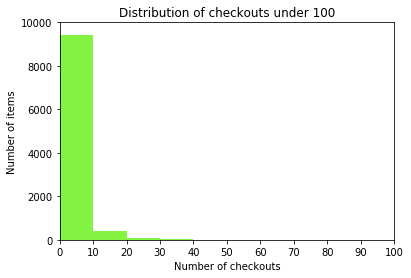

In [23]:
# Der Median allein reicht mir zur Beantwortung meiner Frage nicht. 
# Deshalb erstelle ich ein Histogramm, dass mir eine Verteilung der Ausleihen unter 100 anzeigen soll.

# Zuerst gebe ich vor, welche bins auf der x-Achse angelegt werden sollen
bins = [0,10,20,30,40,50,60,70,80,90,100]

# Ich definiere, welcher Parameter genutzt werden sollen und gebe eine Farbe vor.
plt.hist(checkouts.checkouts, bins=bins, color='#83f442')

# Außerdem gebe ich vor, dass die bins nicht mittig über den Werten angelegt werden.
plt.xticks(bins)

# An dieser Stelle wird das Histogramm beschriftet
plt.xlabel("Number of checkouts", fontsize=10)
plt.ylabel("Number of items",fontsize=10)
plt.xlim([0,100])
plt.ylim([0,10000])
plt.title("Distribution of checkouts under 100")

plt.show()

## 3. Frage: Wie ist das Verhältnis zwischen Books und Ebooks in der Ausleihe?

Eine beliebter Vorwurf gegenüber digitaler Medien ist die Sorge, dass E-Books "normale" Bücher zukünftig ersetzen. Um dieses Argument zu entkräftigen oder zumindest die Fallzahlen zu beobachten, ist es interessant zu Überprüfen, in welchem Verhältnis die Ausleihzahlen dieser Pubilkationsform zueinander stehen. 

In [24]:
# Als erstes lasse ich mir Werte aus der Spalte "materialtype" anzeigen, 
# um zu ermitteln welche materialtypes grunsätzlich vorliegen. 

checkouts['materialtype']

0            BOOK
1            BOOK
2       SOUNDDISC
3            BOOK
4            BOOK
          ...    
9995         BOOK
9996        EBOOK
9997        EBOOK
9998    VIDEODISC
9999         BOOK
Name: materialtype, Length: 10000, dtype: object

In [ ]:
#Aus dem Gesamtdatensatz alle Book-Einträge rausfiltern

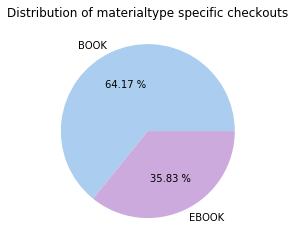

In [25]:
#Aus dem gesamten Dataset kann ich durch diesen Befehl alle BOOK- und alle EBOOK-Einträge herausfiltern. 
#Diese werden über den Befehlt count()[0] gezählt.
BOOK = checkouts.loc[checkouts['materialtype'] == 'BOOK'].count()[0]
EBOOK = checkouts.loc[checkouts['materialtype'] == 'EBOOK'].count()[0]

#Im nächsten Schritt möchte ich daraus ein Kreisdiagramm erstellen. Ich definieren die Beschriftung und die Farben
labels = ['BOOK', 'EBOOK',]
colors = ['#abcdef', '#ccaadd']

#In plt.pie gebe ich die Variablen an und füge noch eine Prozentangabe hinzu. Außerdem gebe ich dem Diagramm einen Titel.
plt.pie([BOOK, EBOOK], labels = labels, colors=colors, autopct='%.2f %%')
plt.title('Distribution of materialtype specific checkouts')
plt.show()